## Problem 1

In [20]:
import numpy as np
import sklearn
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [27]:
m=np.array([[0,1,2,2,3,3,4],[1,1,1,3,2,3,5]]).T

In [39]:
norm2 = normalize(m, axis=0)
print(norm2.shape)

(7, 2)


In [38]:
pca = PCA(n_components=2)
pca.fit(m)  
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.90348825 0.09651175]
[4.68421365 1.53096596]


In [43]:
pca = PCA(n_components=1)
pca.fit_transform(m)

array([[-2.37927216],
       [-1.72018519],
       [-1.06109821],
       [ 0.44303524],
       [ 0.35005549],
       [ 1.10212221],
       [ 3.26534264]])

In [44]:
pca = PCA(n_components=2)
pca.fit(norm2)  
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  
pca = PCA(n_components=1)
pca.fit_transform(norm2)

[0.90236562 0.09763438]
[0.68570361 0.22555194]


array([[-0.35760987],
       [-0.25186487],
       [-0.14611987],
       [ 0.05767881],
       [ 0.06152447],
       [ 0.16342382],
       [ 0.4729675 ]])

## Problem 3

In [108]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [50]:
from numpy import genfromtxt
my_data = genfromtxt('poly_data.csv')

In [54]:
X=my_data[:,0]
y=my_data[:,1]

In [121]:
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [140]:
MSE=[]
for i in range(15):
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    MSE_i=[]
    for train_index, test_index in kf.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        known_degree_model = PolynomialRegression(deg=i)
        known_degree_model.fit(X_train, y_train)
        coef_=known_degree_model.coef_
        y_pre=known_degree_model.predict(X_test)
        MSE_i.append(mean_squared_error(y_test,y_pre))
    MSE.append(np.mean(MSE_i))

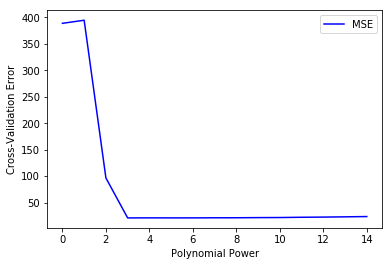

In [141]:
plt.plot(range(len(MSE)), MSE, color='b', label='MSE');
plt.legend(loc="best");
plt.xlabel("Polynomial Power");
plt.ylabel("Cross-Validation Error");
plt.show()

In [142]:
np.argmin(MSE)

3

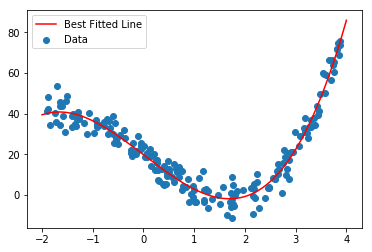

In [144]:
plot_xs = np.linspace(-2, 4, (4 - (-2)) * 100)

best_model = PolynomialRegression(deg=3)
best_model.fit(X, y)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(X, y, label='Data');
ax.plot(plot_xs, best_model.predict(plot_xs), color='r', label='Best Fitted Line');
ax.legend(loc='best');
plt.legend(loc='best');


## Problem 4

### eigenfaces

In [203]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [204]:
data=faces.get('data')
X_images=faces.get('images')
y_names = faces.get('target')
n_samples, h, w = X_images.shape

In [205]:
print(X_images.shape)
print(data.shape)

(1348, 62, 47)
(1348, 2914)


In [219]:
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(data);
X_proj=pca.fit_transform(data);

In [208]:
n_of_com=25
comp=pca.components_[:n_of_com]
print(comp.shape)

(25, 2914)


In [209]:
eigenfaces = comp.reshape((n_of_com, h, w))

In [210]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):

    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

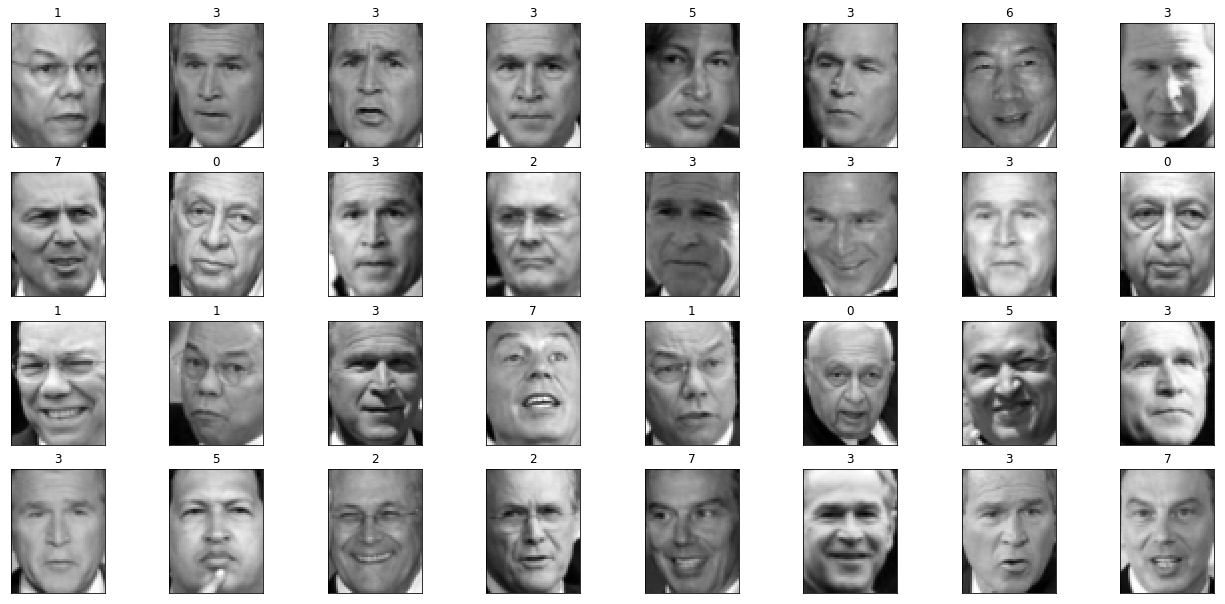

In [213]:
plot_portraits(X_images, y_names, h, w, n_row=4, n_col=8)

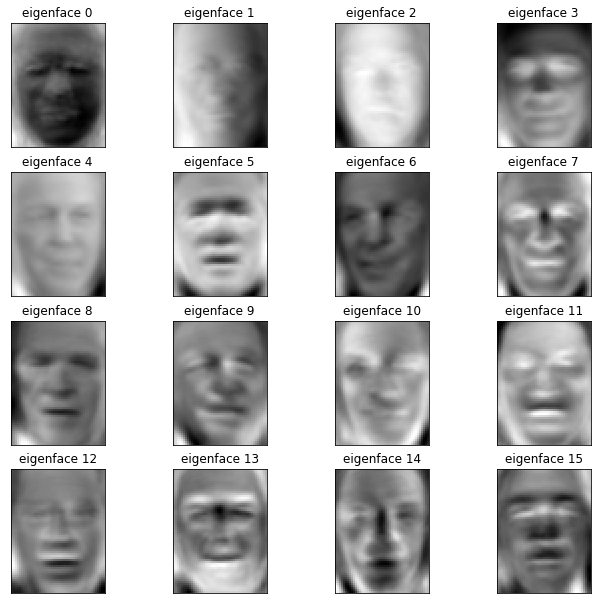

In [214]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)

### reconstruct

In [220]:
X_inv_proj=pca.inverse_transform(X_proj)
X_proj_img = np.reshape(X_inv_proj,(n_samples, h, w))

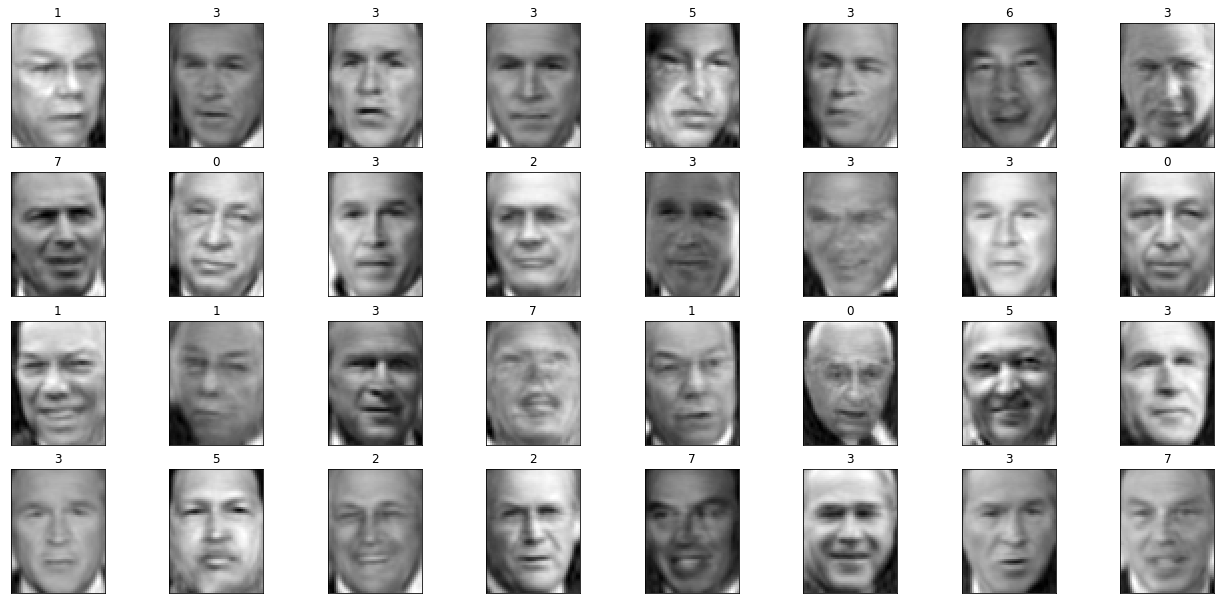

In [222]:
plot_portraits(X_proj_img, y_names, h, w, n_row=4, n_col=8)